In [1]:
#The basics
import pandas as pd 
import numpy as np

#HTML and text analysis 
import requests
import requests_ftp
import requests_cache
import lxml
import re
import urllib
from wordcloud import WordCloud, STOPWORDS
import random
from bs4 import BeautifulSoup
from collections import Counter

#Plotting
import seaborn as sns
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

#Cache
requests_cache.install_cache('urban_cache')


In [2]:
def urbandic(term, section):
    """
    accept the search term and section (either meaning or example) as an argument and
    return the full set of meanings or examples for the first page 
    """
    initial_url = 'http://www.urbandictionary.com/'
    term = "define.php?term=" + term
    full_url = initial_url + term 
    page = requests.get(full_url)
    page_html = page.text
    soup = BeautifulSoup(page_html, 'lxml')
    sec = soup.find_all("div", {'class': section}) #[4] #this has various elements, so run a list comprehension
    text = "".join([x.getText() for x in sec]).split("\n"); #gets all the text 
    text[:] = (value for value in text if value != '') #get rid of blank unicode objects
    definitions = [re.sub("\r", "", i) for i in text]
    return definitions 

In [3]:
def urban(searchterm, oursection, page=1):
    """
    accept the search term and section (either meaning or example) as an argument and
    return the full set of meanings or examples for any number of pages
    """
    if page == 1:
        #ourlist = ["meaning", "example"]
        return(urbandic(searchterm, oursection))
    if page > 1:
        pages_wanted = [searchterm+"&page="+str(x) for x in range(1,page+1)]
        all_articles = [urbandic(page, oursection) for page in pages_wanted]
        return([item for sublist in all_articles for item in sublist])
        

women = urban("women", "meaning", 35) #Create a list for all meanings for "women", since UD's "last" button gives us #pages
womEx = urban("women", "example", 35) #List for women examples
men = urban("women", "example", 9)
menEx = urban("men", "example", 9) 

In [10]:
type(women)

list

In [4]:
stopwords = STOPWORDS
more_stopwords = set(["women", "men", "human", "female", "said", "woman", "guys", "being", "man", "male", "will", "one", "also", "often",
                     "time", "way", "always", "extremely", "people", "guy", "girl", "mens"]) #stopwords are subjective
stopwords = set(stopwords).union(more_stopwords)

<type 'unicode'>


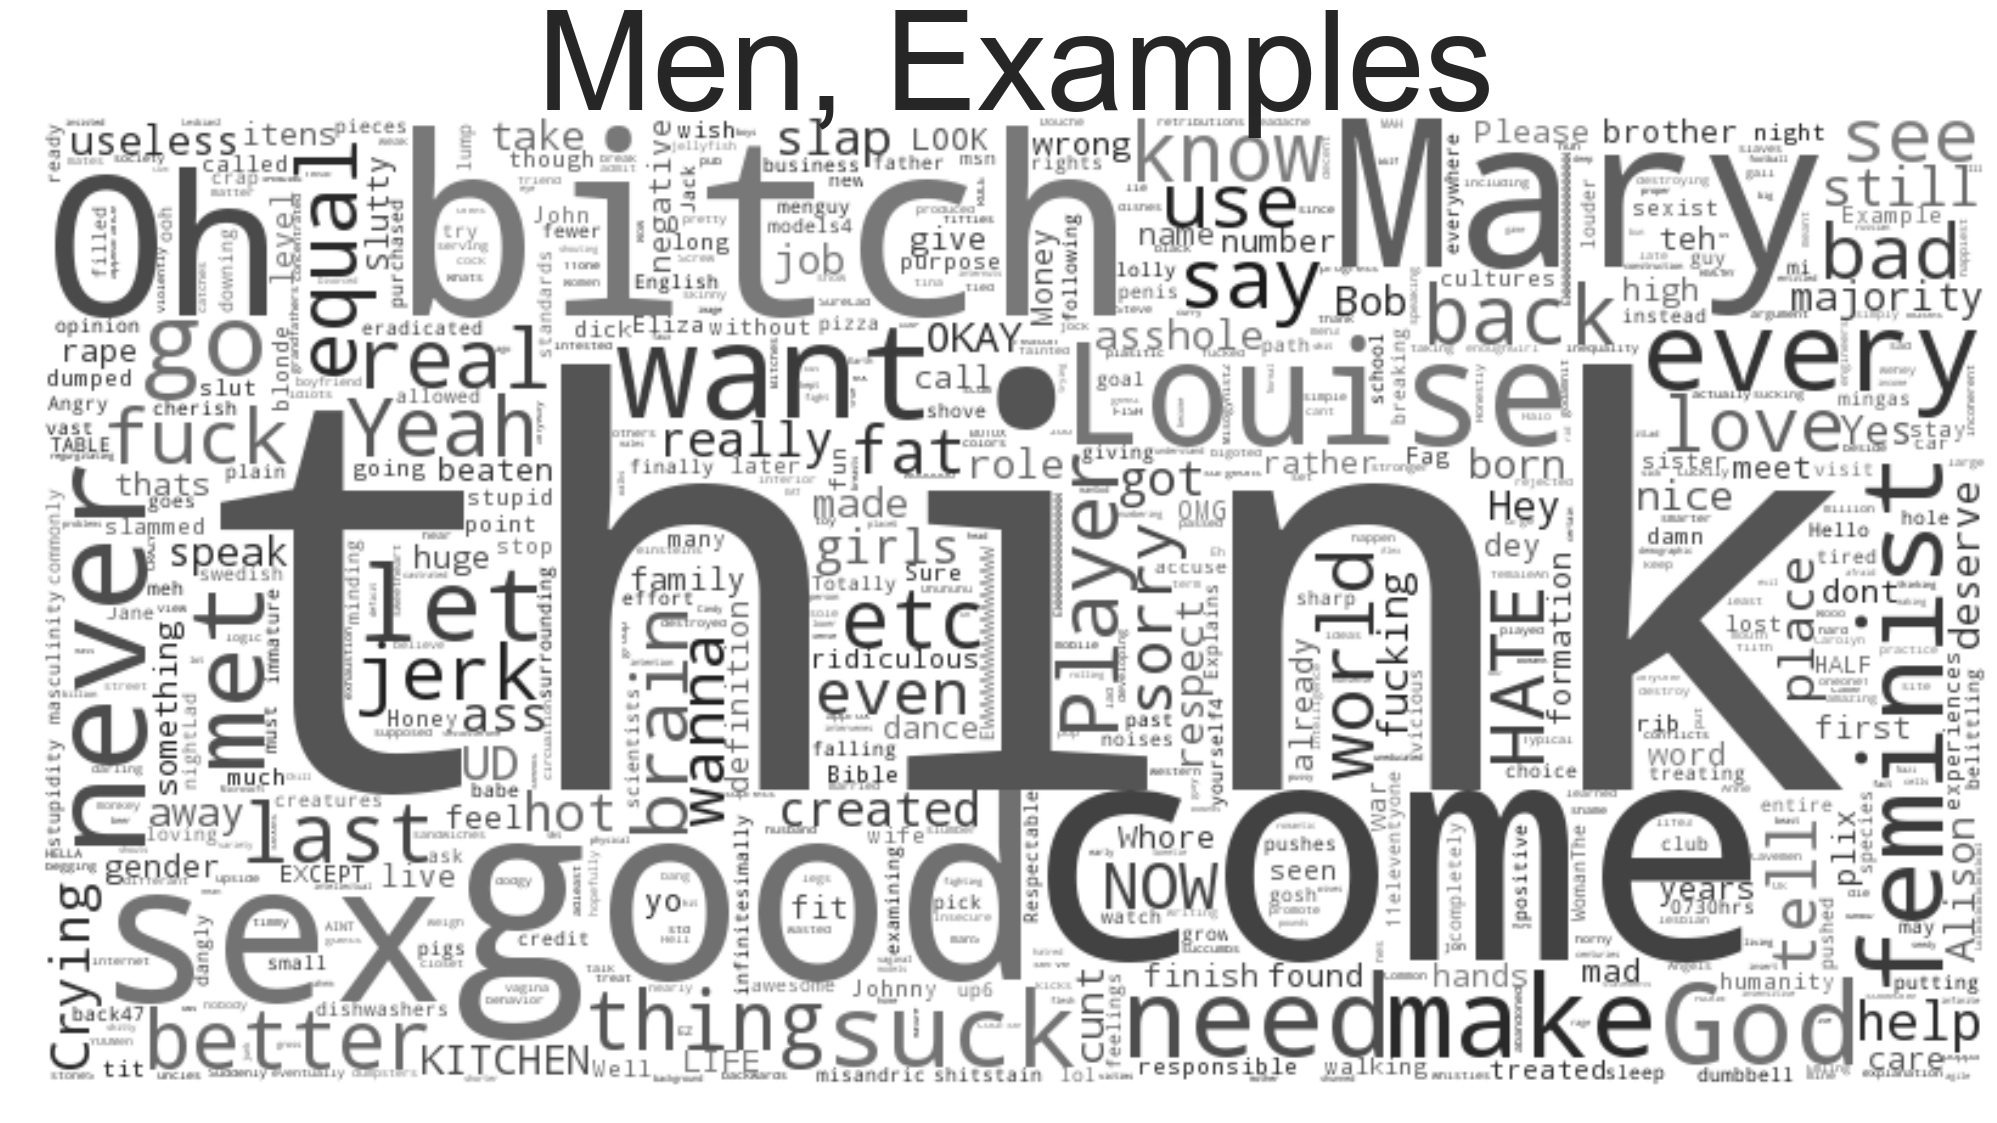

In [12]:
def wordcloud(term, title): 
    #ourlist = ["women", "womEx", "men", "menEx"]
    want = [item for item in term if item not in stopwords]
    want = " ".join(want)
    print type(want)
    #Generate WordCloud image
    wc = WordCloud(background_color = "white", max_words=5000, stopwords=stopwords, width=800, height=400)

    #Generate WordCloud
    wc.generate(want)

    #Coloring
    def grey_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
        return "hsl(50, 0%%, %d%%)" % random.randint(10, 50)

    #Plotting
    plt.figure(figsize=(20,10))
    plt.imshow(wc.recolor(color_func = grey_color_func, random_state=3))
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.title(title, size = 100)
    plt.show()
    
#wordcloud(women, "Women: Meaning")
#wordcloud(womEx, "Women: Examples")
#wordcloud(men, "Men: Meaning")
wordcloud(menEx, "Men, Examples")

In [6]:
leadership = pd.read_csv('leadership.csv') 
leadership.head()

,﻿CaseID,Q1,Q4A,Q4B,Q4C,Q4D,Q5A,Q5B,Q6A,Q6B,...,PPSTATEN,PPT01,PPT25,PPT612,PPT1317,PPT18OV,PPWORK,PPNET,weight,duration
0,3.0,2,3,3,4,3,3,3,3,3,...,43,0,0,0,0,2,1,1,0.6284,91.0
1,4.0,1,1,1,2,1,3,3,3,3,...,59,0,0,0,0,2,1,1,1.0476,3.0
2,5.0,2,2,2,2,1,3,3,3,-1,...,14,0,1,0,0,1,7,1,1.5255,12.0
3,6.0,2,3,2,3,2,3,3,3,3,...,64,0,0,0,0,1,1,1,0.7028,9.0
4,7.0,1,3,2,3,2,3,3,2,1,...,54,0,0,0,0,1,1,1,1.0476,8.0


For our project, we want to answer the following questions. 
1. Does the Pew Research Center's survey on gender and leadership suggest that there is a discrepancy between perception and reality? Do people believe that men systematically outperform women? 
2. Which categories seem to have the most difference? 

Create graphs to show that women tend to respond the same as men 
get census wage data

In [ ]:
#Question 16 a-g: Women in top executive business positions